In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv('adult.csv')
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [3]:
data.education.value_counts()
pd.get_dummies(data.occupation,dtype=int)

,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
48838,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
48839,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
48840,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
data=pd.concat([data.drop('occupation',axis=1),pd.get_dummies(data.occupation,dtype=int).add_prefix('occupation_')],axis=1)
data=pd.concat([data.drop('workclass',axis=1),pd.get_dummies(data.workclass,dtype=int).add_prefix('workclass_')],axis=1)
data=pd.concat([data.drop('relationship',axis=1),pd.get_dummies(data.relationship,dtype=int).add_prefix('relationship_')],axis=1)
data=pd.concat([data.drop('marital-status',axis=1),pd.get_dummies(data['marital-status'],dtype=int).add_prefix('marital-status_')],axis=1)
data=pd.concat([data.drop('race',axis=1),pd.get_dummies(data.race,dtype=int).add_prefix('race_')],axis=1)
data=pd.concat([data.drop('native-country',axis=1),pd.get_dummies(data['native-country'],dtype=int).add_prefix('native-country_')],axis=1)
data

,age,fnlwgt,education,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,11th,7,Male,0,0,40,<=50K,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,HS-grad,9,Male,0,0,50,<=50K,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,Assoc-acdm,12,Male,0,0,40,>50K,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,Some-college,10,Male,7688,0,40,>50K,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,Some-college,10,Female,0,0,30,<=50K,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,Assoc-acdm,12,Female,0,0,38,<=50K,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,HS-grad,9,Male,0,0,40,>50K,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,HS-grad,9,Female,0,0,40,<=50K,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,HS-grad,9,Male,0,0,20,<=50K,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
data['gender']=data['gender'].apply(lambda x:1 if x=='Male' else 0)
data['income']=data['income'].apply(lambda x:1 if x=='>50K' else 0)
data=data.drop(['education'],axis=1)
data

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,1,0,0,20,0,0,1,...,0,0,0,0,0,0,0,1,0,0


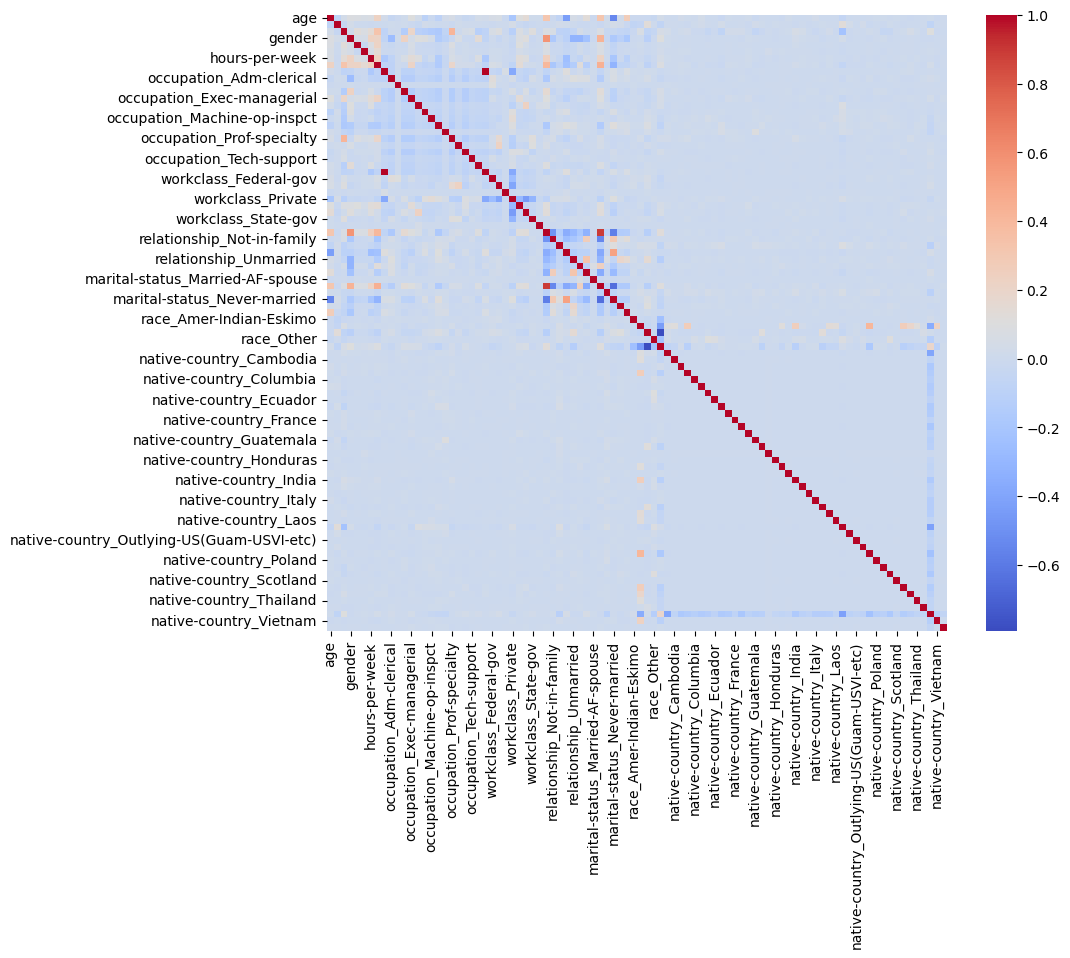

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=False,cmap='coolwarm')
plt.show()

In [7]:
data.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005405,0.007480,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.001766,-0.001512,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002575,-0.001157,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native-country_Trinadad&Tobago,0.001056,0.004153,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002068,0.007917,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native-country_United-States,0.011888,-0.070645,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005546,0.022126,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native-country_Vietnam,-0.012337,-0.007479,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004082,0.010905,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


In [19]:
data_corr=data.corr()['income'].abs()
datacorr_sort=data_corr.sort_values()
num_col_dlt=int(0.8*len(data.columns))
col_rem=datacorr_sort.iloc[:num_col_dlt].index
drop_col=data.drop(col_rem,axis=1)

In [20]:
drop_col

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married
0,25,7,1,0,0,40,0,0,0,0,0,0,0,1,0,0,0,0,1
1,38,9,1,0,0,50,0,0,0,0,0,1,0,0,0,0,0,1,0
2,28,12,1,0,0,40,1,0,0,0,0,1,0,0,0,0,0,1,0
3,44,10,1,7688,0,40,1,0,0,0,0,1,0,0,0,0,0,1,0
4,18,10,0,0,0,30,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,0,0,0,0,0,1,0,1,0
48838,40,9,1,0,0,40,1,0,0,0,0,1,0,0,0,0,0,1,0
48839,58,9,0,0,0,40,0,0,0,0,0,0,0,0,1,0,0,0,0
48840,22,9,1,0,0,20,0,0,0,0,0,0,0,1,0,0,0,0,1


In [21]:
col_rem

Index(['native-country_Cuba', 'native-country_Hong',
       'native-country_Holand-Netherlands', 'native-country_Hungary',
       'native-country_Ireland', 'occupation_Armed-Forces',
       'native-country_Thailand', 'native-country_Poland',
       'native-country_Cambodia', 'native-country_Scotland',
       'native-country_Portugal', 'native-country_?',
       'native-country_Yugoslavia', 'fnlwgt', 'native-country_Germany',
       'native-country_China', 'native-country_Honduras',
       'workclass_Without-pay', 'native-country_South',
       'native-country_Ecuador', 'native-country_Laos',
       'workclass_Never-worked', 'native-country_Philippines',
       'marital-status_Married-AF-spouse', 'native-country_Trinadad&Tobago',
       'native-country_Italy', 'native-country_Greece',
       'native-country_Outlying-US(Guam-USVI-etc)', 'native-country_Jamaica',
       'native-country_Iran', 'native-country_Peru', 'native-country_Haiti',
       'native-country_Japan', 'occupation_Craft-r

<Axes: >

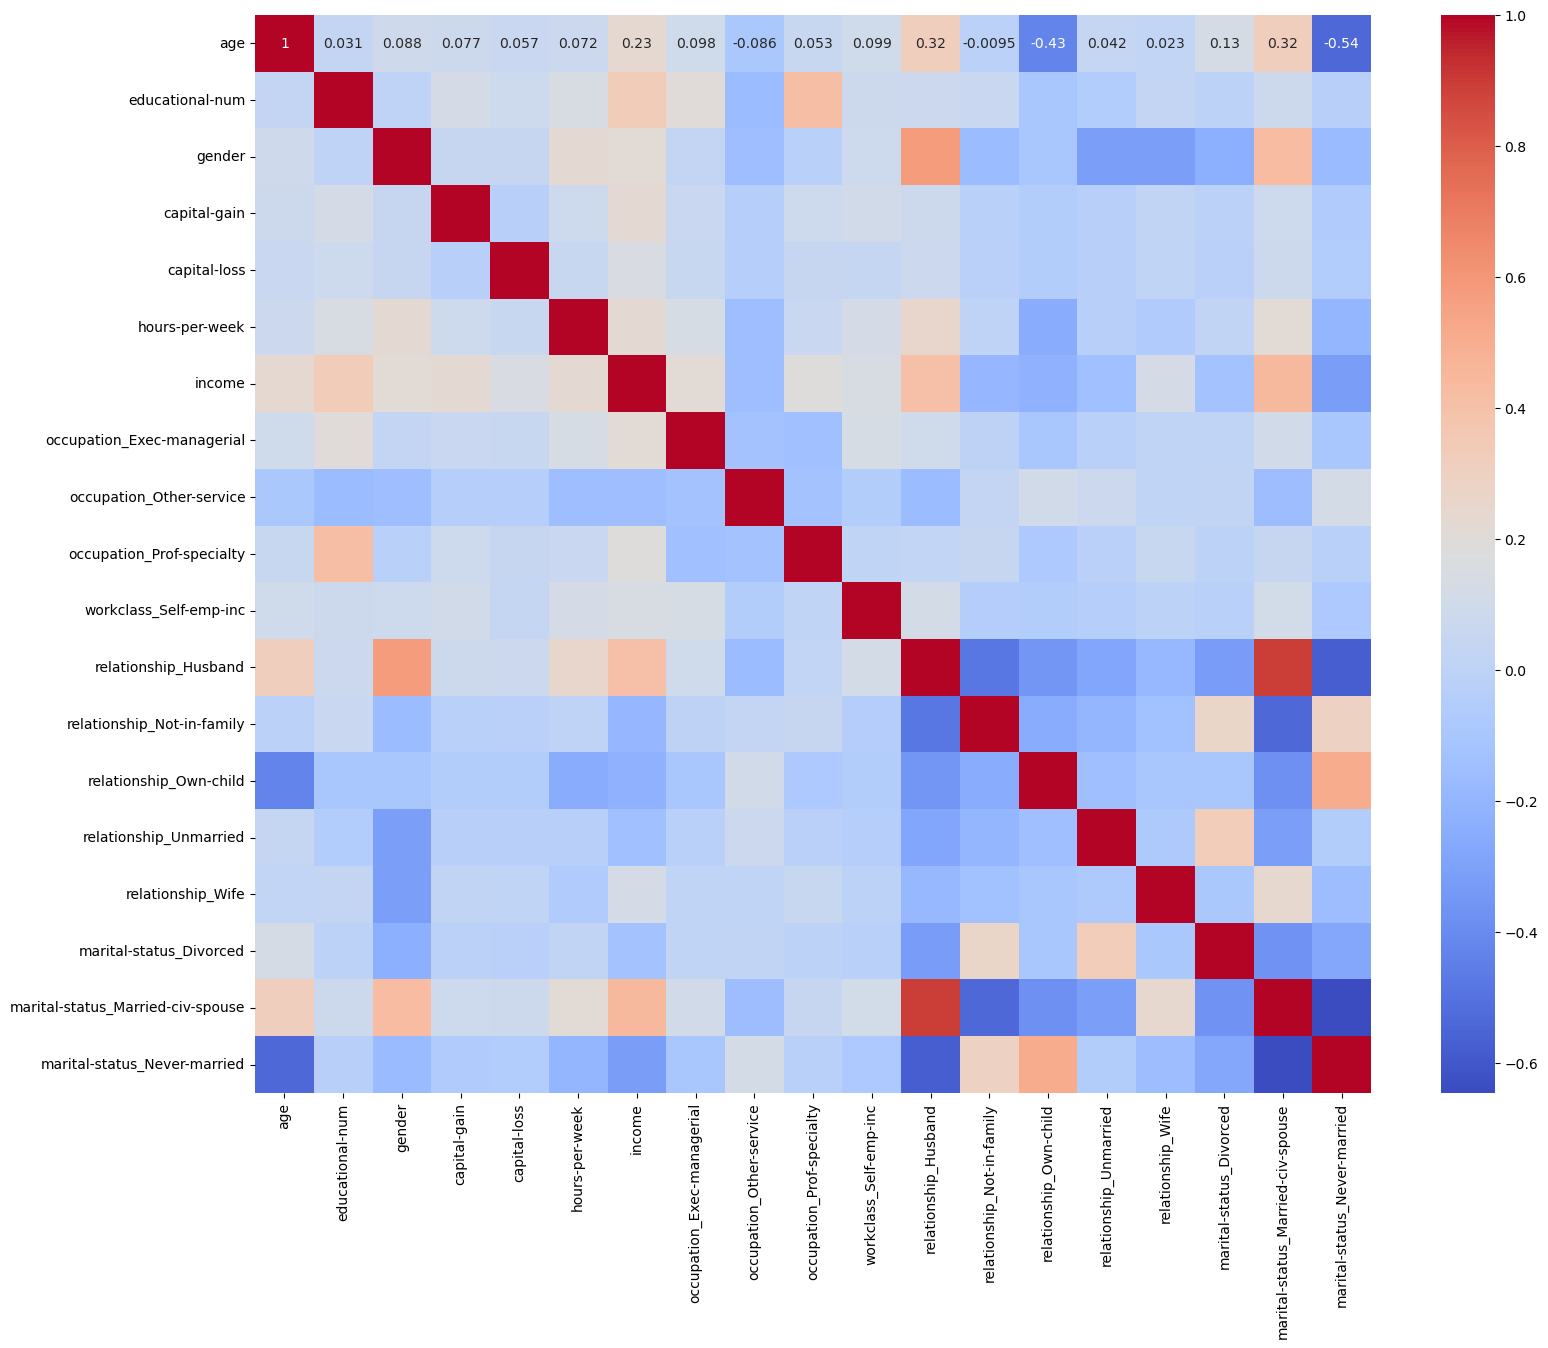

In [25]:
plt.figure(figsize=(18,14))
sns.heatmap(drop_col.corr(),annot=True,cmap='coolwarm')
#plt.show()

In [26]:
data

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,1,0,0,20,0,0,1,...,0,0,0,0,0,0,0,1,0,0
